# Práctica 5. Wordlet - cadenas de caracteres (Tema 5)
## Enunciado de la práctica

### Objetivos
- Profundizar en el manejo de las cadenas de caracteres mediante índices.
- Adquirir gran manejo y experiencia trabajando con bucles.
- Implementar una solución compleja a partir de unos requisitos dados.
- Aplicar la algorítmica necesaria para alcanzar un producto de software completo.

### Restricciones
- Se escribirá todo el programa en una celda.
- Solo se podrán utilizar las librerías, funciones y estructuras vistas en clase.

### Funcionalidad del programa

Se implementará el juego del Wordlet.

Existirá una palabra clave de 5 letras a acertar, la cual se guardará en una variable. El juego proporcionará 5 opciones al usuario para acertar la palabra introducida indicando las pistas siguientes:
- Letra GRIS: no existe la letra en la palabra a acertar
- Letra ROJA: existe pero no en la posición correcta
- Letra VERDE: existe esa letra y está en la posición correcta.

Se asume que todas las palabras que introduzca el usuario serán de 5 letras. 

El programa gestionará las palabras en mayúsculas, se escriban como se escriban.


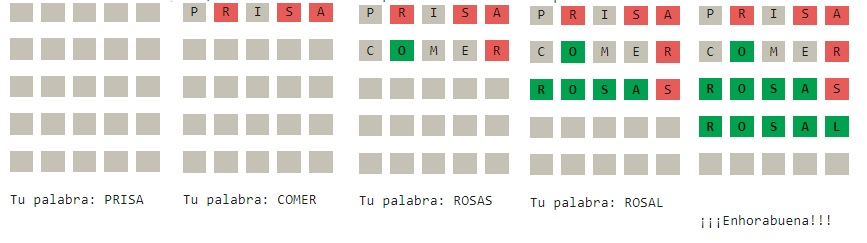

### Implementación del programa

Se desarrollará de forma incremental, llegando a soluciones parciales plenamente funcionales. No se pasará a la siguiente fase hasta no tener un producto funcional.

#### Incremento I

Mostrar el tablero vacío del juego y comprobar que se puede mostrar celdas de colores. Se proporciona un código de ejemplo. Vease cómo los códigos de colores proporcionados permiten aplicar un color de fondo o el de por defecto. 
- Probar a crear un tablero sin letras (vacío).
- Crear un tablero con el fondo verde o rojo. 

A continuación se muestra una ayuda sobre el funcionamiento de coloreado del fondo de caracteres. Existen unos códigos de consola que permiten **modicar la apariencia del texto que se escribe posteriormente**. Por ejemplo, si deseo que aparezca "Hola" en verde, "Adiós" en rojo y "Me voy" en el color por defecto (negro), deberá poner: 

In [1]:
GRIS = "\033[0;47m"
VERDE = "\033[1;42m"
ROJO = "\033[0;41m"
DEFECTO = "\033[0m"

print(VERDE,"Hola",ROJO, "Adiós", DEFECTO, "Me voy")

 Hola  Adiós  Me voy


In [10]:
GRIS = "\033[0;47m"
VERDE = "\033[1;42m"
ROJO = "\033[0;41m"
DEFECTO = "\033[0m"

palabra_vacia = " " * 5
palabra_objetivo = "abcde"
filas = 0
while filas < 5:
    columnas = 0
    while columnas < len(palabra_vacia):
        print(f"{GRIS} {palabra_vacia[columnas]} {DEFECTO} ", end = "")  # Ojo con los escpacios, son los que permiten establecer la separación entre celdas
        columnas += 1
    print("\n")  # Los dos retornos de carro permiten establecer el espacio vertical
    filas += 1

#### Incremento II

Pedir palabras por teclado e insertarlas en cada una de las filas.

#### Incremento III

Como se sabe que todas las palabras tendrán una longitudd de 5 caracteres, las palabras que vaya introduciendo por teclado el usuario serán guardadas en una única variable, quedando almacenado así después de introducir las 5 palabras: CISNE, ARBOL, CARPA, COMER y RISAS.
```
"CISNEARBOLCARPACOMERRISAS"  --> string de palabras introducidas
 0123456789012345678901234   --> índice
   1    2     3    4   5     --> # palabra

```

#### Incremento IV

Crear el tablero real del juego mezclando las filas de las palabras escritas y con las filas vacías, para que formen un total de 5 filas.

## Solución

In [ ]:
FILAS_MAX = 5
INTENTOS_MAX = FILAS_MAX
LETRAS = 5

GRIS = "\033[0;47m"
VERDE = "\033[1;42m"
ROJO = "\033[0;41m"
DEFECTO = "\033[0m"

palabra_objetivo = "ROSAL"
palabra_vacia = " " * LETRAS
palabra_agrupada = ""
intentos = 0 
palabra = palabra_vacia

filas = 0
while filas < FILAS_MAX:
    for letra in palabra_vacia:
        print(f"{GRIS} {letra} {DEFECTO} ", end = "")
    print("\n")
    filas += 1

while intentos < INTENTOS_MAX:
    """
    Pide la palabra
    """    
    palabra = input("Tu palabra:")
    palabra_agrupada += palabra.upper()

    """
    Muestra el tablero con palabras introducidas
    """
    filas_introducidas = 0
    num_palabras_introducidas = len(palabra_agrupada)//LETRAS

    while filas_introducidas < num_palabras_introducidas:
        i = filas_introducidas * LETRAS
        j = (filas_introducidas + 1) * LETRAS
        palabra_introducida = palabra_agrupada[i:j]

   
        indice = 0
        contador_ok = 0
        while indice < len(palabra_introducida):
            """
            Valida la palabra
            """   
            letra = palabra_introducida[indice]
            if letra == palabra_objetivo[indice]:
                color = VERDE
                contador_ok += 1
            else:
                if letra in palabra_objetivo:
                    color = ROJO
                else:
                    color = GRIS
            # Imprime la palabra introducida con los aciertos o no
            print(f"{color} {letra} {DEFECTO} ", end = "")
            indice += 1
            
        print("\n")
        filas_introducidas += 1
        
    """
    Muestra el tablero vacío
    """
    filas = filas_introducidas
    while filas < FILAS_MAX:
        for letra in palabra_vacia:
            print(f"{GRIS} {letra} {DEFECTO} ", end = "")
        print("\n")
        filas += 1
   
    intentos += 1
    
    if contador_ok == LETRAS:
        intentos = INTENTOS_MAX
        print("\n¡¡¡Enhorabuena!!!\n")